In [2]:
import sqlite3
conn=sqlite3.connect("Salesdata.db")
conn.execute('''
     create table sales(
          order_id int auto_increament primary key,
          product_name varchar(50),
          qyantity int(20),
          amount int(1000)
          )
         ''')
conn.close()

OperationalError: table sales already exists

In [3]:
import sqlite3
conn=sqlite3.connect("Salesdata.db")
ins='''
    insert into sales(product_name,qyantity,amount) values
    ("Widget A","4","480")
'''
conn.execute(ins)
conn.commit()
conn.close()

In [4]:
import pandas as pd
import sqlite3
import matplotlib.pyplot as plt

In [10]:
import sqlite3
conn=sqlite3.connect("Salesdata.db")
cursor = conn.cursor()

query = """
SELECT product_name, 
       SUM(qyantity) AS total_qty, 
       SUM(amount) AS revenue
FROM sales
GROUP BY product_name;
"""

cursor.execute(query)
results = cursor.fetchall()   # list of tuples
print(results)

[('Contraption', 26, 17400), ('Doohickey', 11, 990), ('Gadget_B', 15, 1125), ('Thingamajig', 10, 1400), ('Widget A', 11, 1320)]


In [12]:
import pandas as pd

query = """
SELECT product_name, 
       SUM(qyantity) AS total_qty, 
       SUM(amount) AS revenue
FROM sales
GROUP BY product_name;
"""

df = pd.read_sql_query(query, conn)
print(df)


  product_name  total_qty  revenue
0  Contraption         26    17400
1    Doohickey         11      990
2     Gadget_B         15     1125
3  Thingamajig         10     1400
4     Widget A         11     1320


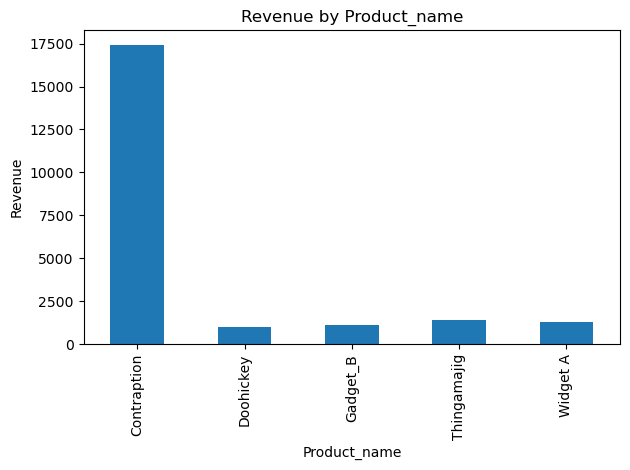

In [14]:
import matplotlib.pyplot as plt

df.plot(kind="bar", x="product_name", y="revenue", legend=False)
plt.title("Revenue by Product_name")
plt.ylabel("Revenue")
plt.xlabel("Product_name")
plt.tight_layout()
plt.savefig("sales_chart.png")   # optional
plt.show()